In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 15,10

In [128]:
data = pd.read_csv('/content/nilai.csv', header = 1)
data.head()
df = data.copy()

In [129]:
data.head()

,NISN Siswa,Pendidikan Agama,Pendidikan Kewarganegaraan,Bahasa Indonesia,Bahasa Inggris,Matematika,Fisika,Sejarah,Seni Budaya,PJOK (Pendidikan Jasmani Olahraga dan Kesehatan),Simulasi dan Komunikasi Digital,Kimia,Sistem Komputer,Komputer dan Jaringan Dasar,Pemrograman Dasar,Dasar Desain Grafis
0,36557825,82,65,77,85,64,75,79,84,76,76,88,82,79,75,77
1,38990885,84,79,82,80,70,75,79,84,86,86,87,86,93,75,86
2,39196359,80,70,82,84,76,75,81,82,86,86,88,84,87,79,82
3,44320603,83,86,84,88,90,76,86,87,79,79,88,85,86,88,79
4,47336431,81,69,80,75,69,77,81,84,78,78,86,86,74,88,87


In [130]:
# data.isna().sum() / data.shape[0] * 100
data.shape[1]

16

In [131]:
X = data.drop('NISN Siswa', axis=1)

# KMeans

In [132]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

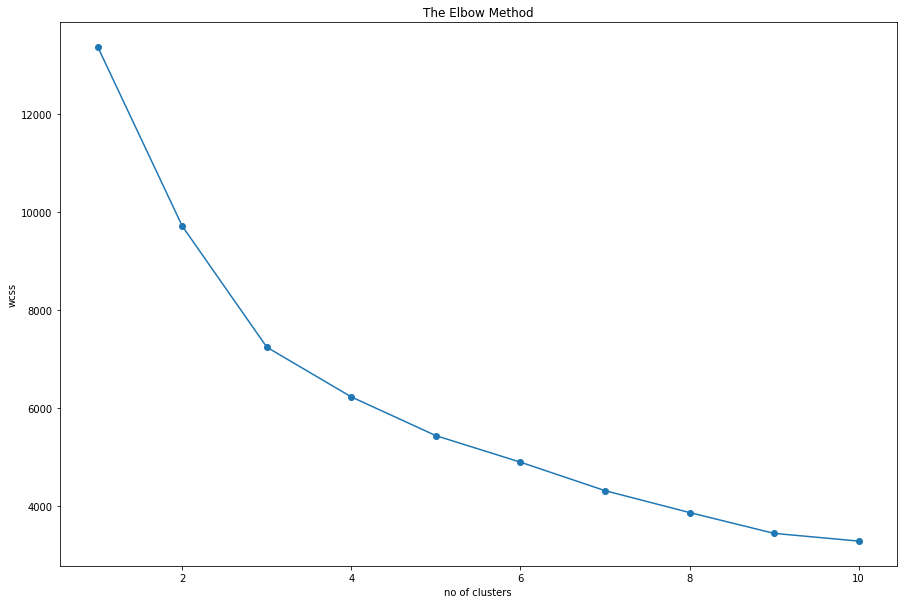

In [133]:
plt.plot(range(1,11), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [134]:
# Silhouette score to determine best cluster
import sklearn.metrics as metrics
for i in range(2,11):
    labels=KMeans(n_clusters=i,init="k-means++",random_state=200).fit(X).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(X,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.6292165216622262
Silhouette score for k(clusters) = 3 is 0.20278981601850782
Silhouette score for k(clusters) = 4 is 0.1834100429455343
Silhouette score for k(clusters) = 5 is 0.17807390669862702
Silhouette score for k(clusters) = 6 is 0.18629836470489172
Silhouette score for k(clusters) = 7 is 0.15542546055841208
Silhouette score for k(clusters) = 8 is 0.15781858478954067
Silhouette score for k(clusters) = 9 is 0.1669801600285507
Silhouette score for k(clusters) = 10 is 0.1614014888412994


In [135]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [136]:
# Add label into dataset
X['kmeans'] = y_kmeans

In [139]:
# Count unique
np.unique(X['kmeans'], return_counts=True)

(array([0, 1, 2], dtype=int32), array([23, 14,  1]))

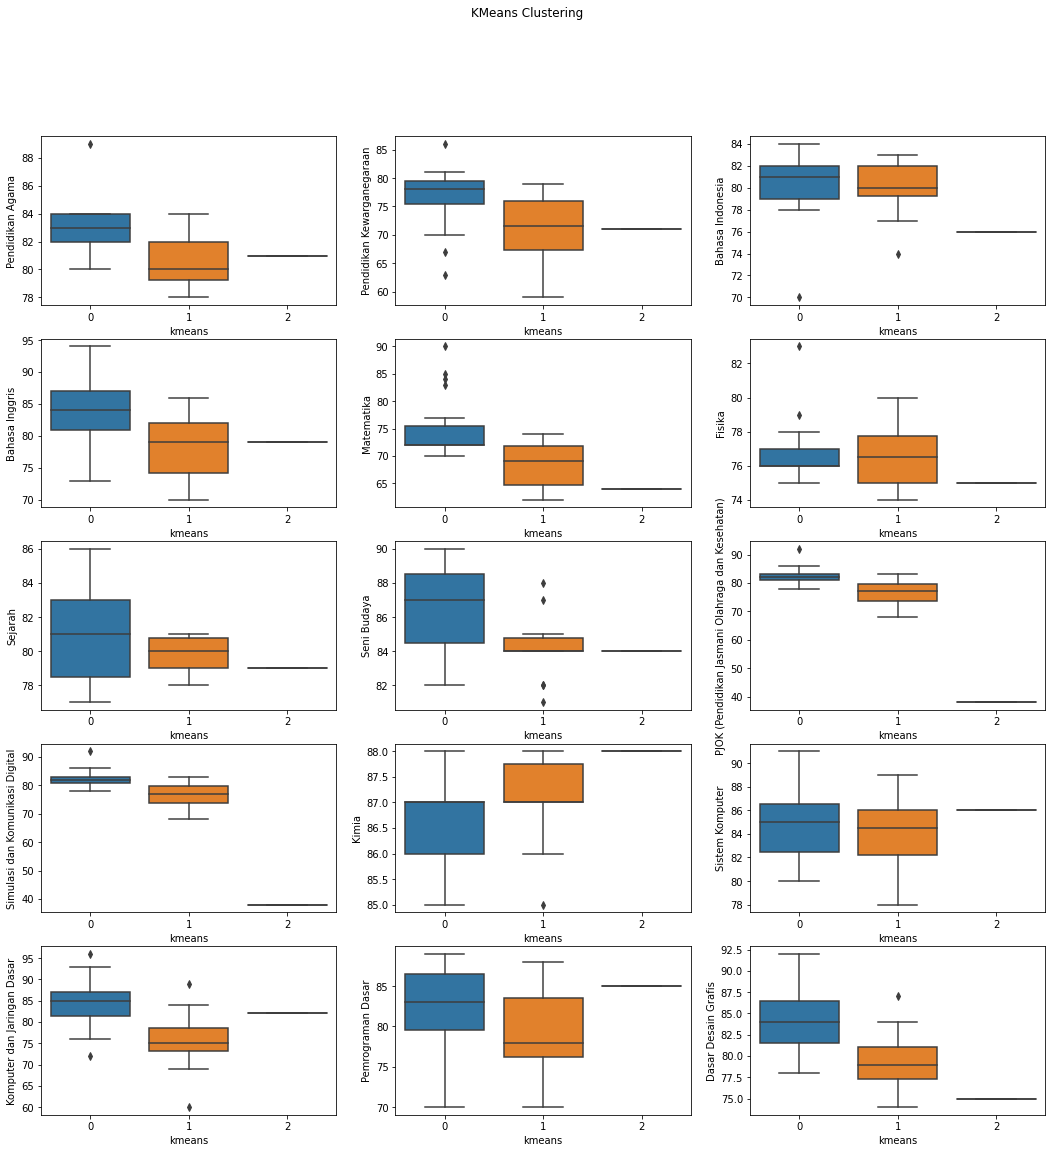

In [165]:
# Plot in boxplot
fig, axes = plt.subplots(5, 3, figsize=(18, 18))
fig.suptitle('KMeans Clustering')
a = 0
for i in range(5):
  for j in range(3):
    sns.boxplot(ax=axes[i][j], data=X, x='kmeans', y=X.columns[a])
    a += 1

# Gaussian Mixture

In [149]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import sklearn.metrics as metrics

Silhouette score for Gaussian Clusters = 2 is 0.32070456844206674
Silhouette score for Gaussian Clusters = 3 is 0.14631707151936127
Silhouette score for Gaussian Clusters = 4 is 0.1079584345381979
Silhouette score for Gaussian Clusters = 5 is 0.14405901017651077
Silhouette score for Gaussian Clusters = 6 is 0.08680765581148955
Silhouette score for Gaussian Clusters = 7 is 0.15132580654379582
Silhouette score for Gaussian Clusters = 8 is 0.11252148895368622
Silhouette score for Gaussian Clusters = 9 is 0.12202660871730067
Silhouette score for Gaussian Clusters = 10 is 0.08982037241425342


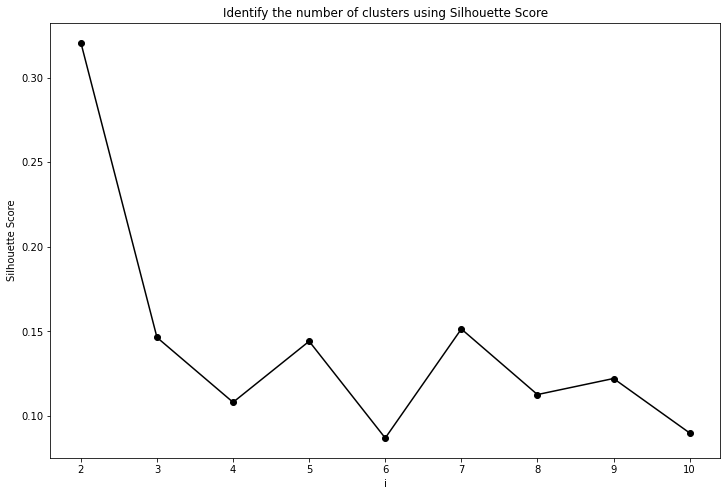

In [150]:
nol = []
I = range(2, 11)
for i in I:
    # Set the model and its parameters
    model = GaussianMixture(n_components=i, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(X)
    # Calculate Silhoutte Score and append to a list
    nol.append(metrics.silhouette_score(X, labels, metric='euclidean'))
    # Print the Silhouette Scores
    print ("Silhouette score for Gaussian Clusters = "+str(i)+" is "
           +str(metrics.silhouette_score(X, labels, metric = 'euclidean')))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(12,8))
plt.plot(I, nol, 'bo-', color='black')
plt.xlabel('i')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [151]:
# Build model
modelgm = GaussianMixture(n_components=3)
clust =  modelgm.fit_predict(X)

In [152]:
# Add label into dataset
X['GaussianMixture'] = clust

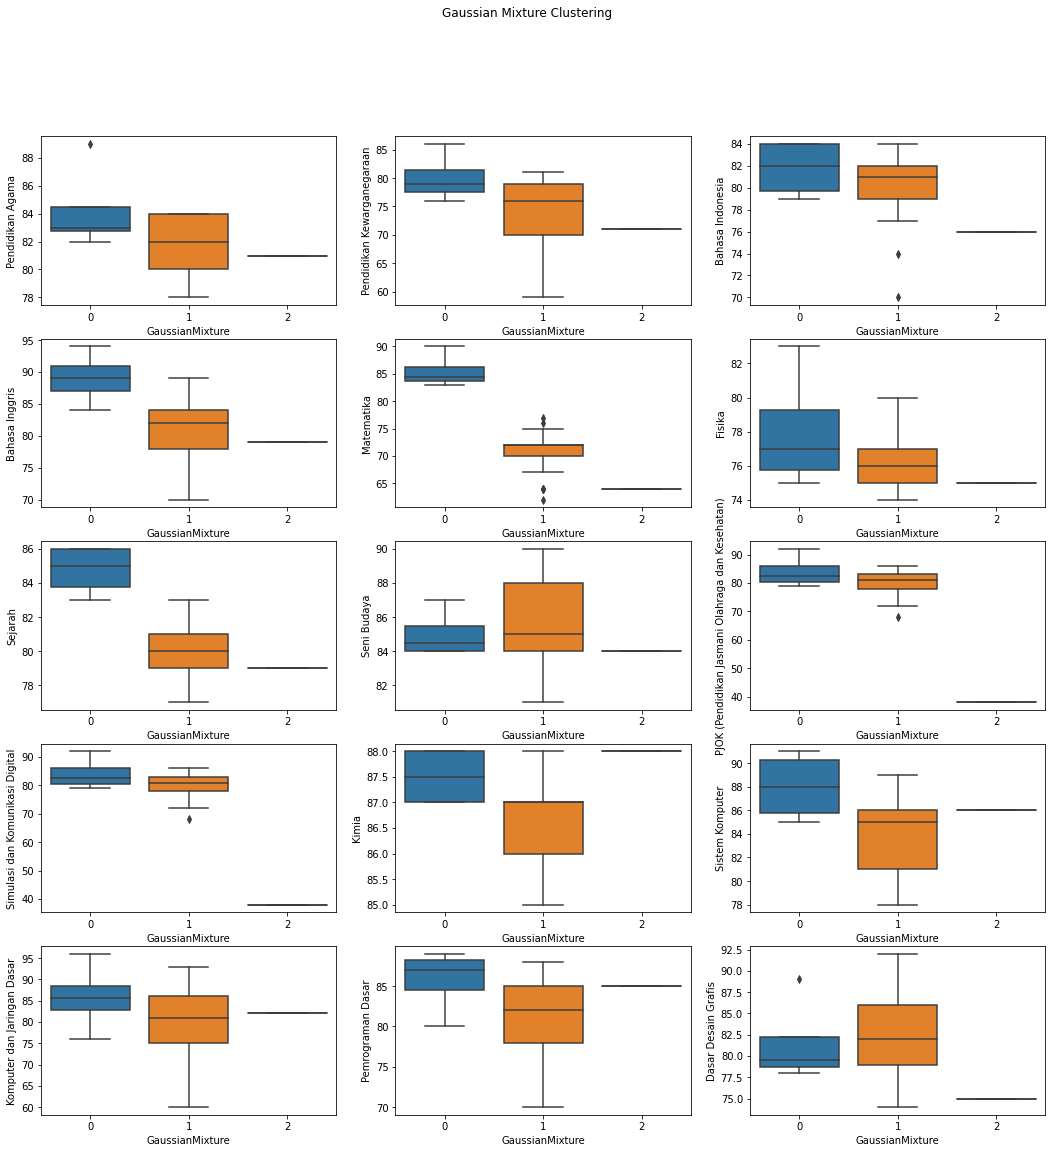

In [153]:
# Plot clusters in boxplot
fig, axes = plt.subplots(5, 3, figsize=(18, 18))
fig.suptitle('Gaussian Mixture Clustering')
a = 0
for i in range(5):
  for j in range(3):
    sns.boxplot(ax=axes[i][j], data=X, x='GaussianMixture', y=X.columns[a])
    a += 1

# Hierarchical Clustering

In [154]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

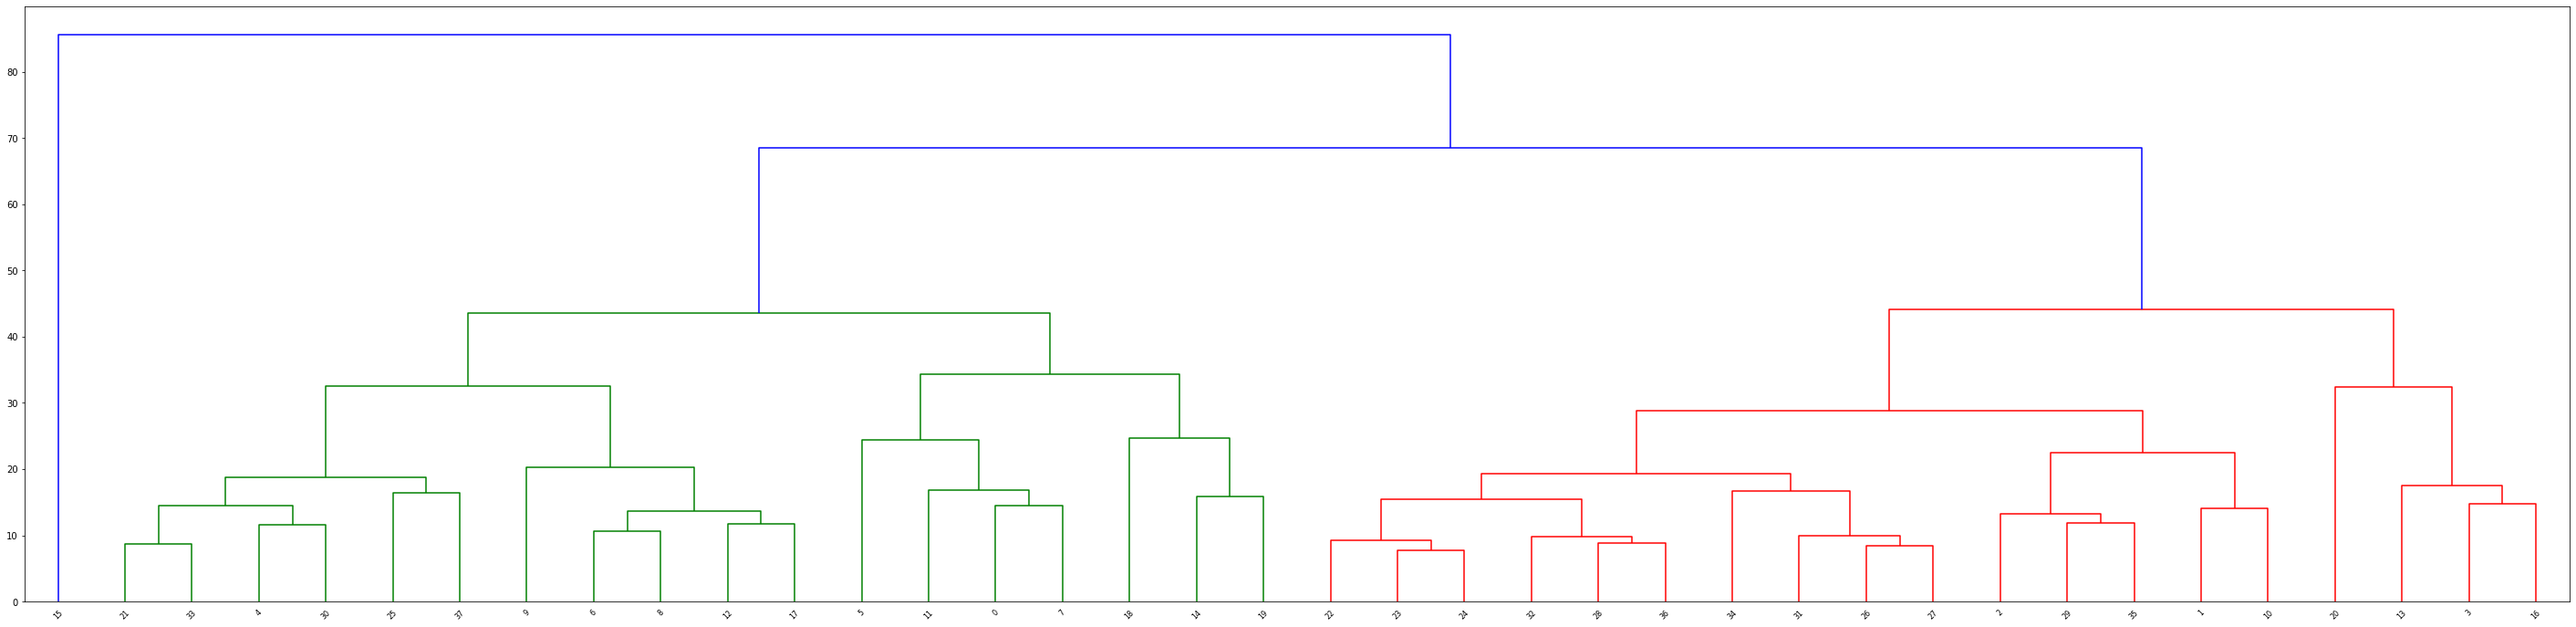

In [155]:
# Plot in dendrogram
plt.figure(figsize=(50, 12))
dend = hcluster.dendrogram(hcluster.linkage(X, method = 'ward'))

In [156]:
# Getting labels from agglomerative clustering
hclusters = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hclusters.fit_predict(X)
hclusters_label = hclusters.labels_

In [157]:
# Adding hcluster label in the dataset
X['hclusters'] = hclusters_label
# X['hclusters']

In [158]:
# Count number of records in every hcluster
pd.Series(hclusters_label).value_counts()

0    19
2    18
1     1
dtype: int64

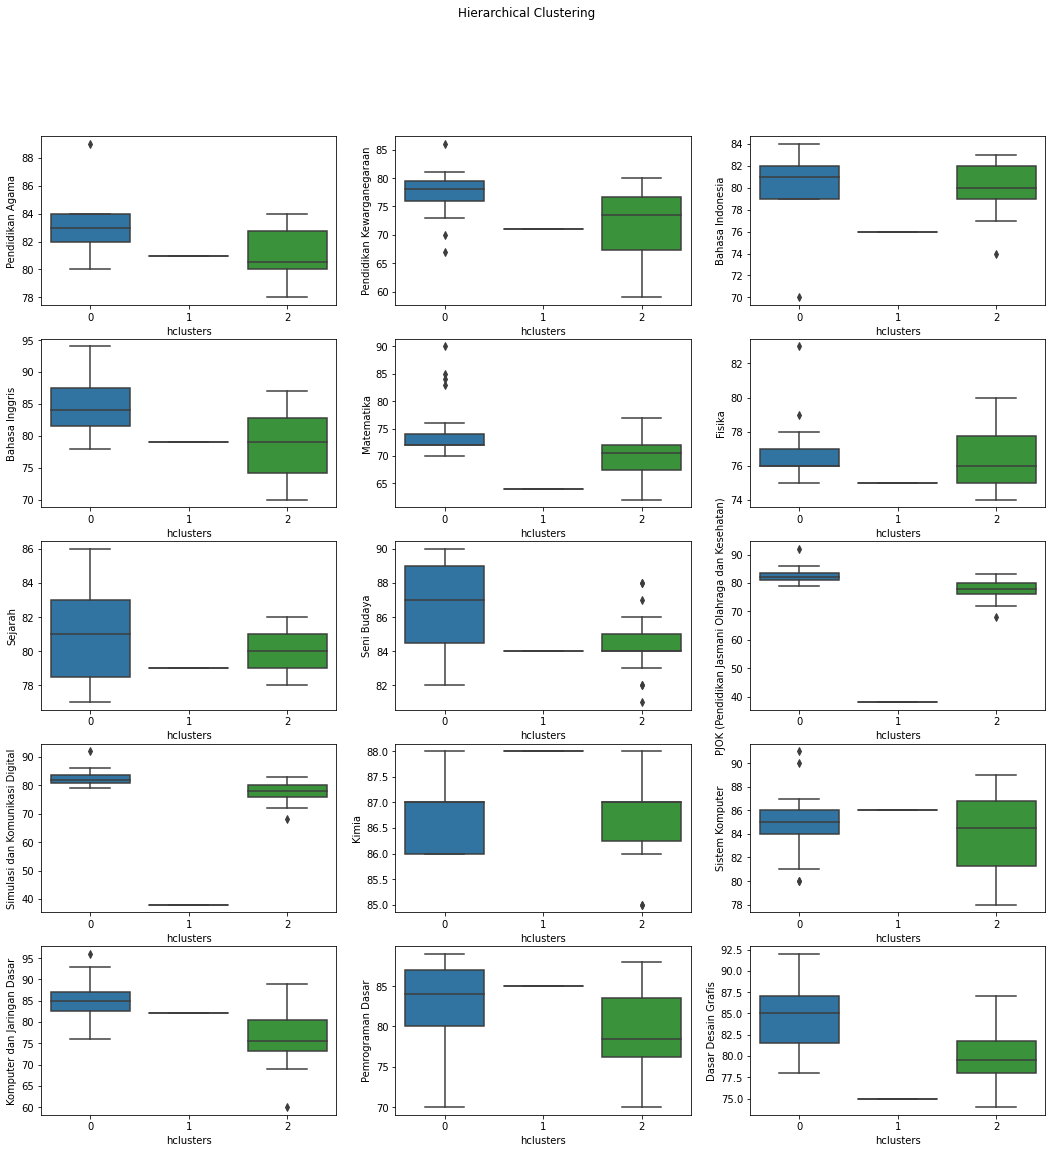

In [159]:
# Plot in boxplot
fig, axes = plt.subplots(5, 3, figsize=(18, 18))
fig.suptitle('Hierarchical Clustering')
a = 0
for i in range(5):
  for j in range(3):
    sns.boxplot(ax=axes[i][j], data=X, x='hclusters', y=X.columns[a])
    a += 1

In [160]:
# Renaming label
kamus_cluster = {
    0: 'Pinter',
    1: 'Gaje',
    2: 'Gblk'
}

# Adding hcluster label in the dataset
X['hclusters'] = X['hclusters'].replace(kamus_cluster)

In [161]:
# Count number of records in every hcluster
pd.Series(X['hclusters']).value_counts()

Pinter    19
Gblk      18
Gaje       1
Name: hclusters, dtype: int64

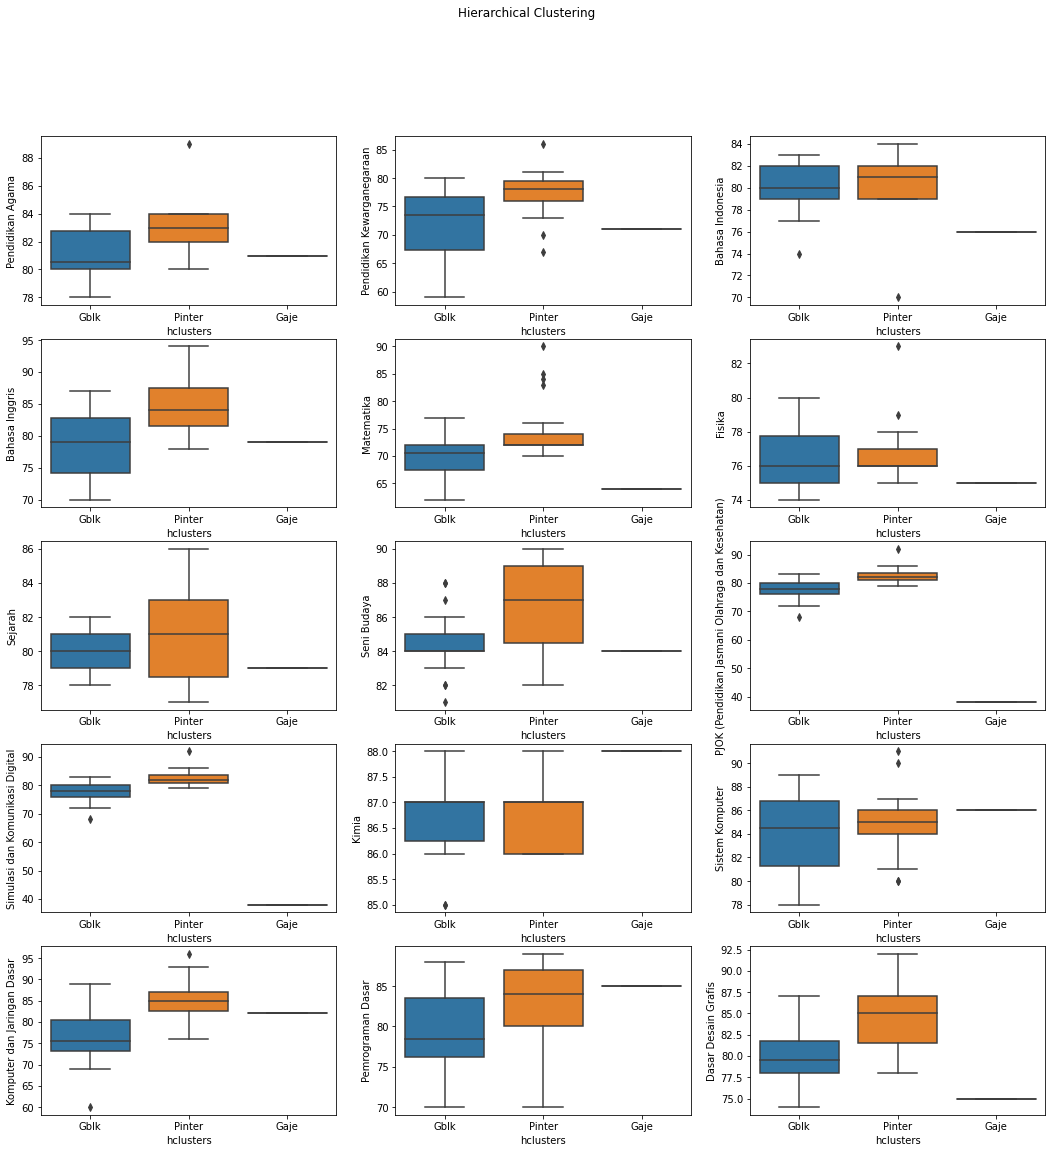

In [162]:
# Plot in boxplot
fig, axes = plt.subplots(5, 3, figsize=(18, 18))
fig.suptitle('Hierarchical Clustering')
a = 0
for i in range(5):
  for j in range(3):
    sns.boxplot(ax=axes[i][j], data=X, x='hclusters', y=X.columns[a])
    a += 1